# Nicholas Shinn Project 3


## Part 1:

### Excercise 1

In [1]:
%%capture
import pip
def install(package):
   pip.main(['install', package]) 

install('ggplot')
install('sklearn')
install('statsmodels')

In [2]:
import pandas as pd, numpy as np, sklearn as skl, sklearn.linear_model
import statsmodels.api as sm, statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from ggplot import *

# Retrieves data from https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


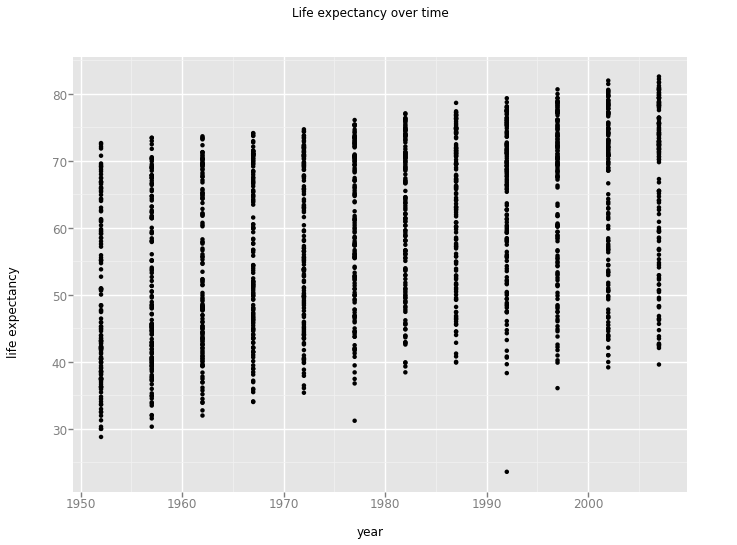

<ggplot: (-9223363280824665989)>

In [3]:
## Utilizes ggplot to create a scatter plot of life expectancies over time for each country
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_point() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

### Question 1 

Based on the scatter plot , there seems to be a general trend of increasing life expectancy over the years. The increase in life expectancy appears to be linear.

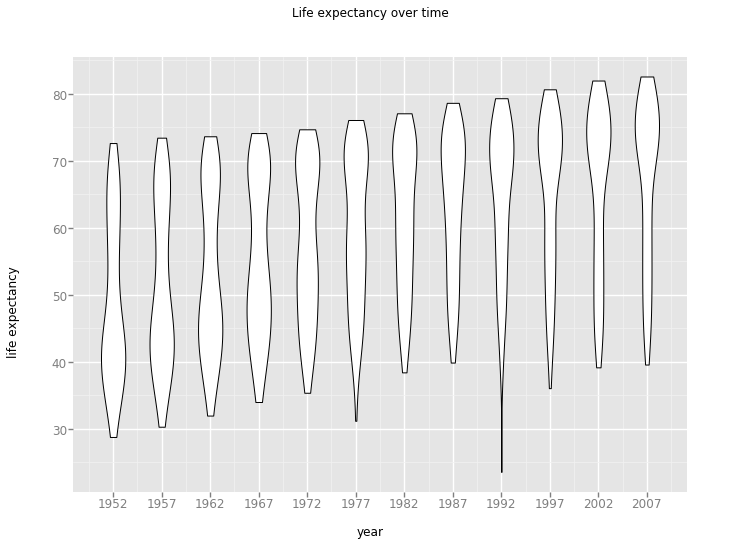

<ggplot: (-9223363280824740727)>

In [4]:
## Prints the violin plot of life expectancy over the years (taken from project spec)
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

### Question 2

The distributions of life expectancy over the years differed greatly. In 1952 and 1957, the distributions were highly skewed right, meaning that many of the life expectancies were below the median around 40-45 years. Beginning in 1962, the distributions began to appear bimodal, meaning that two modes began to appear. One mode lying around 40-50 years and the upper mode lying around 65-70 years. Following 1977 the distributions appeared to be less bimodal and more skewed left, so more of the life expectancies were beginning to appear around the previous upper mode, which is around 70 years. Towards the year 2007, most of the distributions were skewed left with the mode continually increasing. Overall the median of the distributions grew from around 50 years to 60 years.

### Question 3

If a relationship between year and life expectancy was tested against a linear regression model, I would choose to reject the null hypothesis of no relationship. If the year was treated as a continuous variable, there would exist a positive correlation between the life expectancy and year variables.

### Question 4

A violin plot of the residuals from the previous question would have the distributions from every year centered around the center of the plot. This is because the center of the plot indicates the predicted variable based on the linear regression model. The first few distributions would have most of the residuals lie below the center line (which means the "violin" would be thicker below the center. The next few distributions that are slightly bimodal will appear evenly spread around the center. The last plots that are skewed left will have many of the residuals lay above the center (so the "violin" will be thicker above the center).

### Question 5

According to the assumptions of the linear regression model, the plot of the residuals should look randomized and spread and appear to have no pattern. This would indicate a strong fit against the sample data. When plotted as a violin plot, the distributions should not appear skewed in any direction, but more unimodal around the center.

### Exercise 2

In [5]:
## Uses the sklearn linear regression object to fit a regression coefficient and y intercept
regr = skl.linear_model.LinearRegression()
regr.fit(data.year.values.reshape(-1,1), data.lifeExp)
r_squared = regr.score(data.year.values.reshape(-1,1), data.lifeExp)
print('Slope: %f' % regr.coef_)
print('Intercept: %.2f' % regr.intercept_)
print('R-Squared: %.2f' % r_squared)

Slope: 0.325904
Intercept: -585.65
R-Squared: 0.19


### Question 6

Based on the fitted linear regression model, the life expectancy increases by 0.326 per year on average (among all the observed continents).

### Question 7

Based on the linear regression model, I would reject the null hypothesis of no relationship because of the r squared coefficient. The coefficent of determination is interpreted as the proportion of the variance in the life expectancy variable that is predictable from the year variable, so an r squared value of 0.19 indicates that there is a weak positive correlation between year and life expectancy.

### Exercise 3

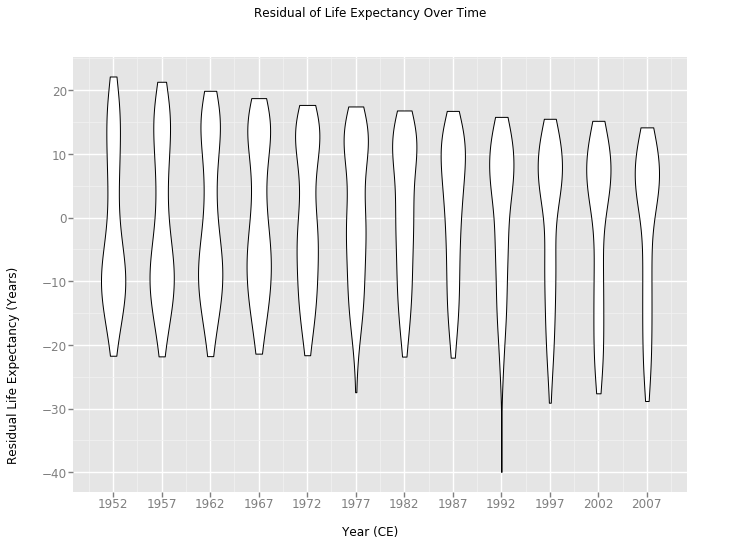

<ggplot: (-9223363280824820932)>

In [6]:
## Calculate predictions and residuals for life expectancy
domain = data.year.values.reshape(-1,1)
predictions = regr.predict(domain)
data = data.assign(pred_LE = predictions)
data = data.assign(resid_LE = data.lifeExp - data.pred_LE)

## Print the violin plot of life expectancy residuals by year
ggplot(aes(x='year', y='resid_LE'), data=data) +\
    geom_violin() +\
    labs(title='Residual of Life Expectancy Over Time',
         x = 'Year (CE)',
         y = 'Residual Life Expectancy (Years)')

### Question 8

The violin plot from the previous exercise matched my expectations from question 4 where the distribution of residuals shifted from right to left across the years, with most of the residuals laying around the center.

### Exercise 4

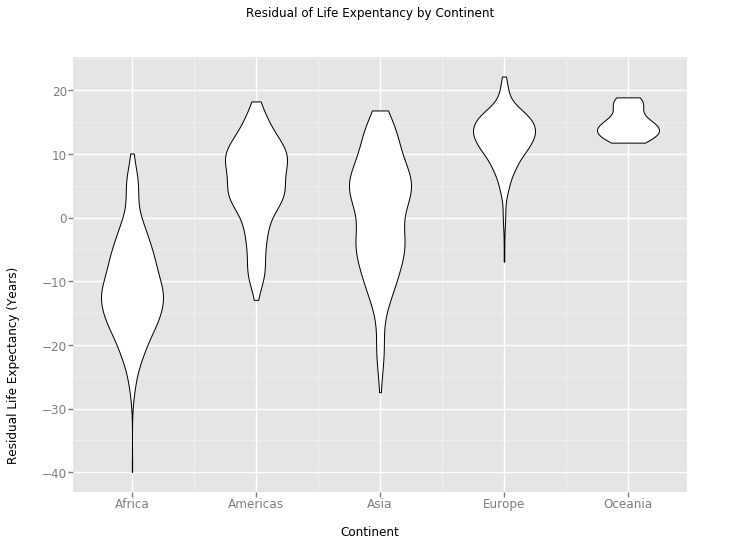

<ggplot: (8756030065619)>

In [7]:
## Print the violin plot of life expectancy residuals grouped by continent
ggplot(aes(x='continent', y='resid_LE'), data=data) +\
    geom_violin() +\
    labs(title='Residual of Life Expentancy by Continent',
         x = 'Continent',
         y = 'Residual Life Expectancy (Years)')

### Question 9

Based on the violin plots, a clear dependence can be observed between model residual and continent. The residuals for the life expectancies in Africa are around 10 years lower than the residuals in asia. Similarly, the model redisuals in the Americas, Europe, and Oceania are significantly higher, respectively in that order. Because of this, an interaction term should be introduced in order to properly fit a linear model based on the difference in continents.

### Exercise 5

/opt/conda/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


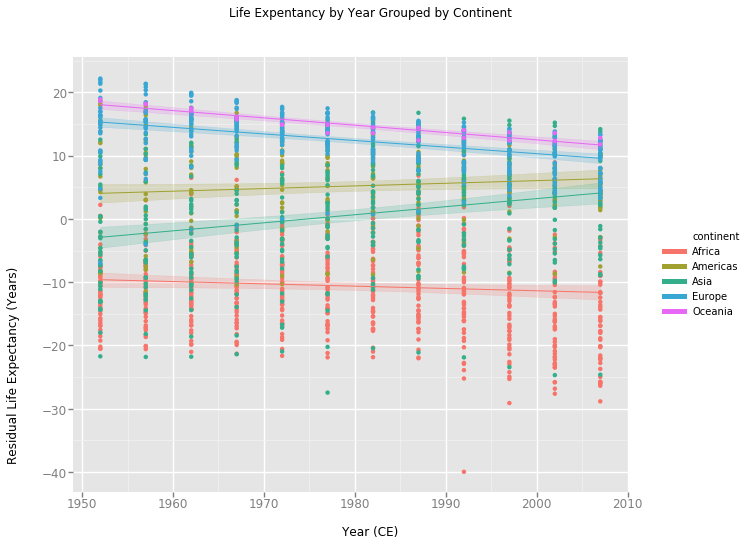

<ggplot: (-9223363280824764016)>

In [8]:
## Prints ONE scatter plot of life expectacy by year, but grouped by continent
ggplot(aes(x='year', y='resid_LE', group='continent', color='continent'), data=data) +\
    geom_point() +\
    stat_smooth(method='lm') +\
    labs(title='Life Expentancy by Year Grouped by Continent',
         x = 'Year (CE)',
         y = 'Residual Life Expectancy (Years)')

### Question 10

Based on the plot of life expectancies over the years grouped by their continents, I can observe that there are multiple linear regression lines with varying slopes. Because the slope of the regression line varies by continent over the years, an interaction term should be included for both continent and year.

### Exercise 6

In [9]:
# Fit a linear regression model for life expectancy including a term for an interaction between continent and year.
results = smf.ols(formula= 'lifeExp ~ year * continent', data= data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 20 Nov 2017   Prob (F-statistic):               0.00
Time:                        19:24:25   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Question 11

Looking at the OLS Regression results, I can see that most of the parameters in the model are close to 0. The only 2 parameters that differ significantly are the continent[T.Oceania] and year:continent[T.Oceania] variables which are 0.287 and 0.36 respectively.  

Note: The OLS regression function only allows for 10 or less parameters, which is why Africa was not listed with the equation.

### Question 12

In [10]:
#Extracts relevant metrics from regression model params
print('Americas: %.3f' % results.params['year:continent[T.Americas]'])
print('Asia: %.3f' % results.params['year:continent[T.Asia]'])
print('Europe: %.3f' % results.params['year:continent[T.Europe]'])
print('Oceania: %.3f' % results.params['year:continent[T.Oceania]'])
avg = (results.params['year:continent[T.Americas]']+results.params['year:continent[T.Asia]']
       +results.params['year:continent[T.Europe]']+results.params['year:continent[T.Oceania]'])/4
print('Average life expectancy increase: %.3f' % avg)

Americas: 0.078
Asia: 0.164
Europe: -0.068
Oceania: -0.079
Average life expectancy increase: 0.024


### Exercise 7

In [11]:
# Calculates the ANOVA for the model with the interaction term
anova_table_1 = sm.stats.anova_lm(results, typ=2)
print('ANOVA With Interaction Term')
print(anova_table_1)
print('\n')

# Calculates the ANOVA for the model without the interaction term
linear_regr = smf.ols(formula= 'lifeExp ~ year', data= data).fit()
anova_table_1 = sm.stats.anova_lm(linear_regr, typ=2)
print('ANOVA Without Interaction Term')
print(anova_table_1)

ANOVA With Interaction Term
                       sum_sq      df            F         PR(>F)
continent       139343.165923     4.0   675.811593   0.000000e+00
year             53919.184217     1.0  1046.027900  4.048499e-179
year:continent    3566.089198     4.0    17.295462   6.463379e-14
Residual         87319.944414  1694.0          NaN            NaN


ANOVA Without Interaction Term
                 sum_sq      df           F        PR(>F)
year       53919.184217     1.0  398.604746  7.546795e-80
Residual  230229.199536  1702.0         NaN           NaN


### F-Test

